In [2]:
#Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
from scipy.stats import zscore #to remove outliers
from scipy.stats import skew
import requests
import pandas_profiling
import io
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset

In [3]:
dset = pd.read_excel("Flight Details v3.xlsx")

# eda

In [4]:
df = dset #dset is kept unmodified for later use

In [5]:
df.head(10)

,Unnamed: 0,Airline,Departure Time,Departure Place,Travel Time,Stops,Arrival Time,Arrival Place,Price
0,0,AirAsia,800,New Delhi,565,1,1725,Chennai,7423
1,1,Air India,600,New Delhi,175,0,855,Chennai,7425
2,2,IndiGo,625,New Delhi,180,0,925,Chennai,7425
3,3,IndiGo,830,New Delhi,175,0,1125,Chennai,7425
4,4,Air India,945,New Delhi,175,0,1240,Chennai,7425
5,5,IndiGo,950,New Delhi,175,0,1245,Chennai,7425
6,6,Spicejet,1625,New Delhi,185,0,1930,Chennai,7425
7,7,Air India,2040,New Delhi,175,0,2335,Chennai,7425
8,8,Spicejet,1840,New Delhi,270,1,2310,Chennai,7425
9,9,Vistara,720,New Delhi,170,0,1010,Chennai,7426


In [6]:
df.drop(columns="Unnamed: 0", axis=1, inplace=True)

In [7]:
df.shape # check the data dimension

(8499, 8)

In [8]:
df.columns

Index(['Airline', 'Departure Time', 'Departure Place', 'Travel Time', 'Stops',
       'Arrival Time', 'Arrival Place', 'Price'],
      dtype='object')

In [9]:
df.dtypes

Airline            object
Departure Time      int64
Departure Place    object
Travel Time         int64
Stops               int64
Arrival Time        int64
Arrival Place      object
Price               int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8499 entries, 0 to 8498
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          8499 non-null   object
 1   Departure Time   8499 non-null   int64 
 2   Departure Place  8499 non-null   object
 3   Travel Time      8499 non-null   int64 
 4   Stops            8499 non-null   int64 
 5   Arrival Time     8499 non-null   int64 
 6   Arrival Place    8499 non-null   object
 7   Price            8499 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 531.3+ KB


In [11]:
df.describe()

,Departure Time,Travel Time,Stops,Arrival Time,Price
count,8499.000000,8499.000000,8499.000000,8499.00000,8499.000000
mean,1210.549006,273.750912,0.533592,1666.02012,7091.752206
std,465.459457,180.897785,0.530230,461.16985,2392.766454
min,10.000000,50.000000,0.000000,120.00000,2818.000000
25%,810.000000,125.000000,0.000000,1305.00000,5591.500000
50%,1155.000000,230.000000,1.000000,1735.00000,6369.000000
75%,1600.000000,400.000000,1.000000,2047.50000,8582.500000
max,2220.000000,970.000000,3.000000,2355.00000,25800.000000


In [12]:
df.isna().sum()

Airline            0
Departure Time     0
Departure Place    0
Travel Time        0
Stops              0
Arrival Time       0
Arrival Place      0
Price              0
dtype: int64

In [13]:
int_cols = df.select_dtypes(exclude=['object']).columns
obj_cols = df.select_dtypes(include=['object']).columns

In [14]:
int_cols

Index(['Departure Time', 'Travel Time', 'Stops', 'Arrival Time', 'Price'], dtype='object')

Departure Time


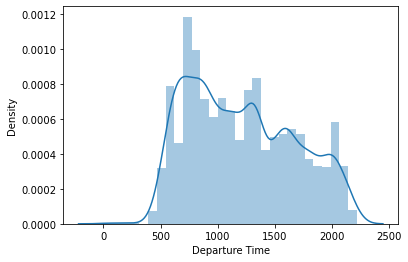

Travel Time


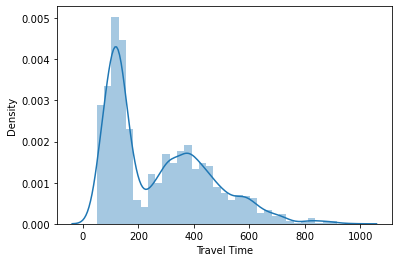

Stops


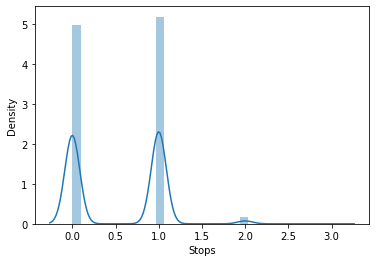

Arrival Time


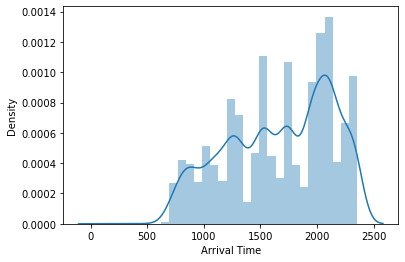

Price


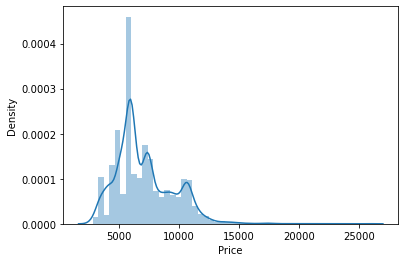

In [15]:
for col in int_cols:
    print(col)
    
    plt.figure()
    sns.distplot(df[col], kde = True)
    plt.show()

Notes:
Most of the flights are with 1 stops or 0 stops. Very few flights are with no stops.
Most of the flight tickets cost between 5000 to 10,000 

Airline


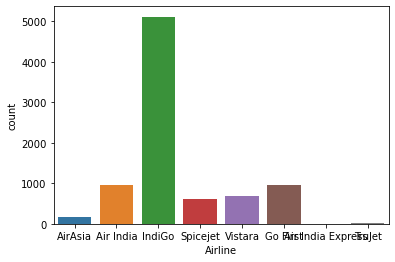

Departure Place


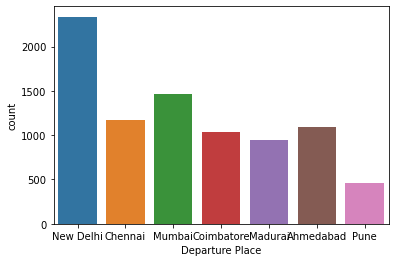

Arrival Place


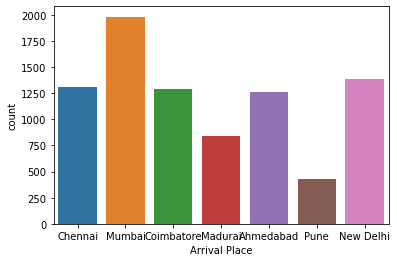

In [16]:
for cols in obj_cols:
    print(cols)
    
    plt.figure()
    sns.countplot(df[cols])
    plt.show()

Notes:
Indigo has the highest number of flights, lowest number of flights are for Air India
Departure: More number of flights are from New Delhi, followed by Mumbai. Pune flights have the lowest number of flights.
Arrival: Most number of flights arrive at Mumbai followed by New Delhi. Pune has lowest number of flights.

Departure Time vs Price


<Figure size 432x288 with 0 Axes>

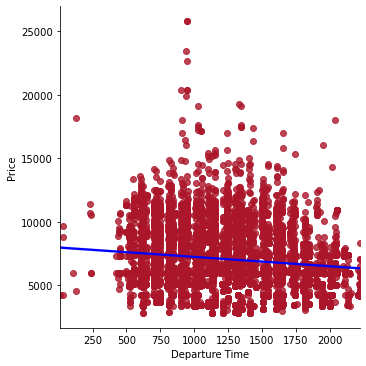

Travel Time vs Price


<Figure size 432x288 with 0 Axes>

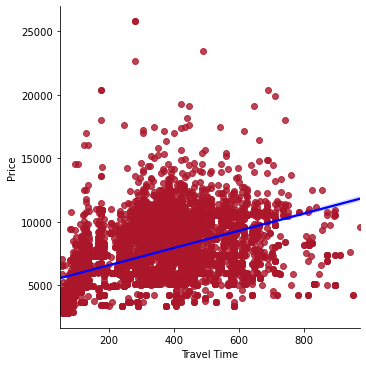

Stops vs Price


<Figure size 432x288 with 0 Axes>

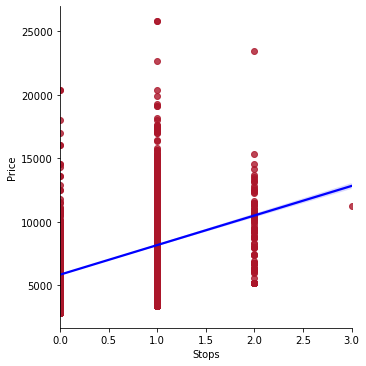

Arrival Time vs Price


<Figure size 432x288 with 0 Axes>

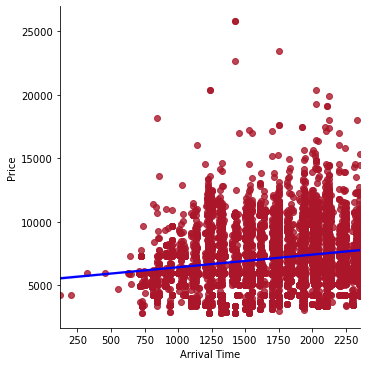

In [17]:
sns.set_palette("RdBu", 10)
for cols in int_cols:
    if cols != "Price":
        print('{} vs Price'.format(cols))
    
        plt.figure()
        sns.lmplot(x = cols, y = 'Price', data = df, line_kws={'color':'blue'})
        plt.show()

Notes:
Morning flights are costiest, evening flights are the cheapest.
Price increases with travel time and number of stops.
Price for flights arriving in the evening is high.

Airline vs Price


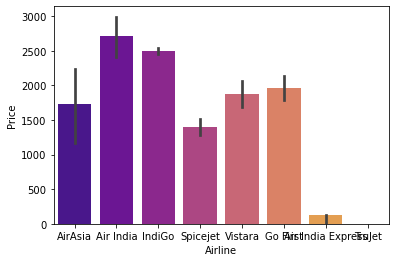

Departure Place vs Price


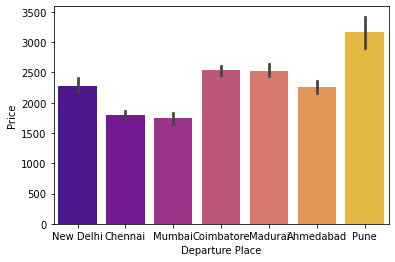

Arrival Place vs Price


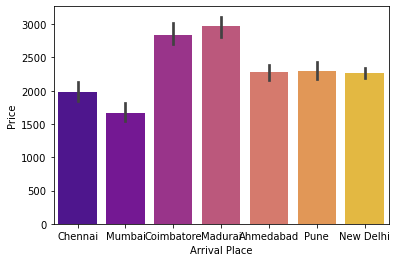

In [18]:
obj_cols1 = dset.select_dtypes(include=['object']).columns
for cols in obj_cols1:
    print('{} vs Price'.format(cols))
    
    plt.figure()
    sns.barplot(x =cols, y ='Price', data = dset,palette ='plasma', estimator = np.std)    
    plt.show()

Notes:
Air India has the highest price followed by Indigo.
ExpressJet has the lowest pice followed by Air India.
Departure: Pune flights are costliest followed by New Delhi.
Departure: Mumbai flights are cheapest followed by Chennai. 
Arrival: Madurai flights are costliest followed by Coimbatore.
Arrival: Mumbai flights are cheapest followed by Chennai.

In [19]:
df_obj = df[obj_cols]
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df_obj = df_obj.apply(LabelEncoder().fit_transform)

In [20]:
df_obj

,Airline,Departure Place,Arrival Place
0,2,5,1
1,0,5,1
2,4,5,1
3,4,5,1
4,0,5,1
...,...,...,...
8494,5,6,0
8495,4,6,0
8496,3,6,0
8497,7,6,0


In [89]:
#Handling missing values in integer type variables

In [21]:
df_int = df[int_cols]

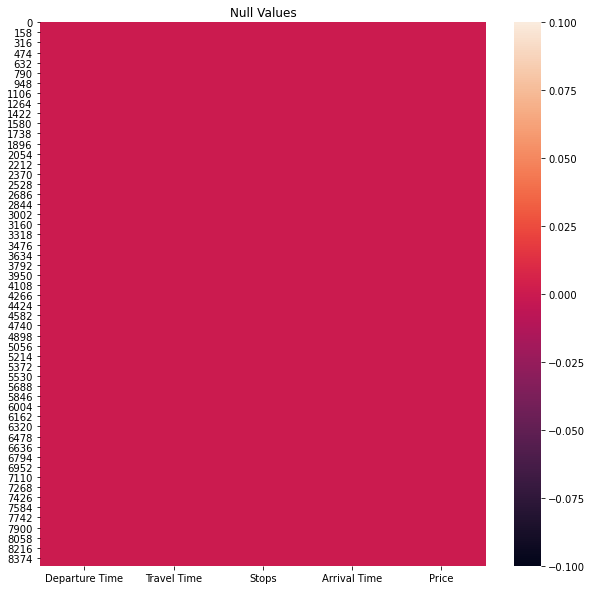

In [22]:
plt.figure(figsize = (10,10))
sns.heatmap(df_int.isnull())
plt.title("Null Values")
plt.show()

In [23]:
df = df_int.join(df_obj)

In [24]:
df

,Departure Time,Travel Time,Stops,Arrival Time,Price,Airline,Departure Place,Arrival Place
0,800,565,1,1725,7423,2,5,1
1,600,175,0,855,7425,0,5,1
2,625,180,0,925,7425,4,5,1
3,830,175,0,1125,7425,4,5,1
4,945,175,0,1240,7425,0,5,1
...,...,...,...,...,...,...,...,...
8494,840,85,0,1005,9422,5,6,0
8495,1640,85,0,1805,10788,4,6,0
8496,1530,345,1,2115,12021,3,6,0
8497,1310,390,1,1940,14148,7,6,0


## check for outliers

In [25]:
#remove outliers before skewness check and before x, y split

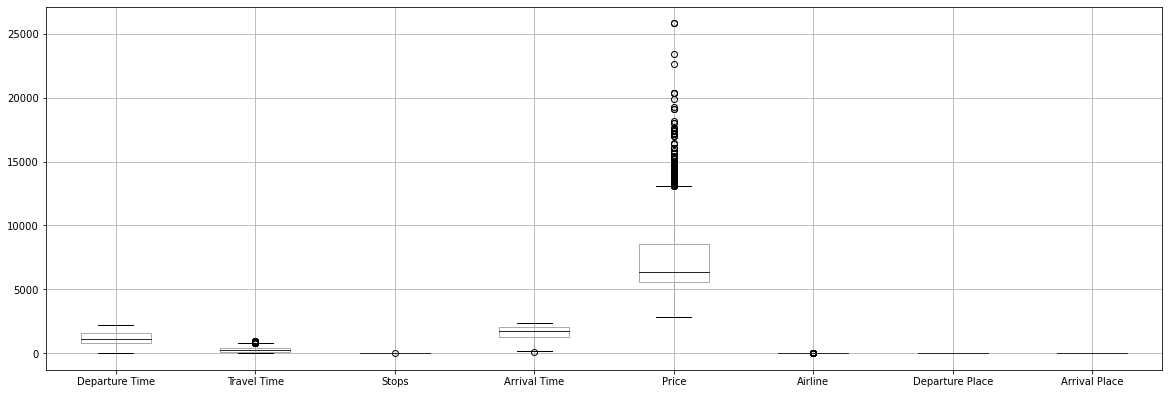

In [26]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [27]:
#Removing outliers by z score

In [28]:
from scipy.stats import zscore
z = np.abs(zscore(df))
new_df = df[(z<3).all(axis=1)]

In [29]:
dataloss = ((df.shape[0]-new_df.shape[0])/df.shape[0])*100
dataloss

1.4472290857747971

In [30]:
df = new_df

In [31]:
#Data loss is low, hence dropping outliers

## check co-relation

In [32]:
#Arrange co-relation in descending order. Dropping columns should be the last option to prevent data loss.

In [33]:
df.columns

Index(['Departure Time', 'Travel Time', 'Stops', 'Arrival Time', 'Price',
       'Airline', 'Departure Place', 'Arrival Place'],
      dtype='object')

In [34]:
df_cor = df.corr()
df_cor["Price"].sort_values(ascending=False)

Price              1.000000
Travel Time        0.550881
Stops              0.533628
Arrival Time       0.192247
Departure Place    0.129798
Arrival Place      0.093535
Airline            0.061458
Departure Time    -0.152437
Name: Price, dtype: float64

## check for skewness

In [35]:
x = df.drop('Price',axis=1)
y = df['Price']

Departure Time
0.32398020476370687


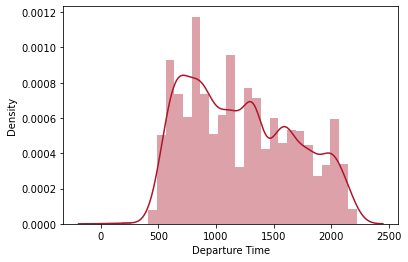

Travel Time
0.6922492130393414


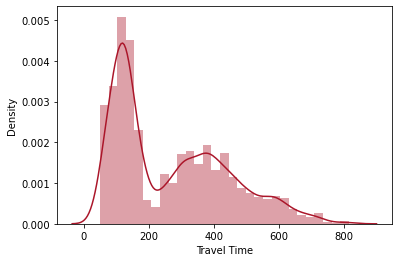

Stops
0.19693601636492142


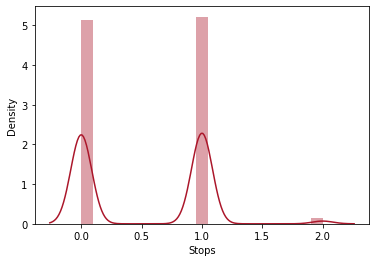

Arrival Time
-0.33066183109053643


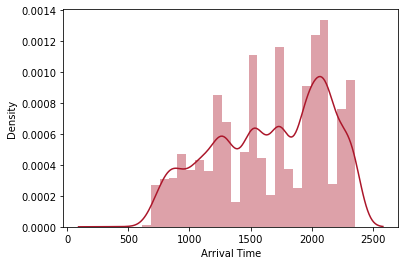

Airline
-0.645730400245848


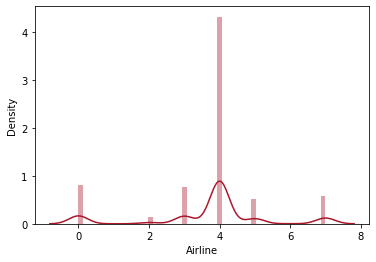

Departure Place
-0.28744909291256976


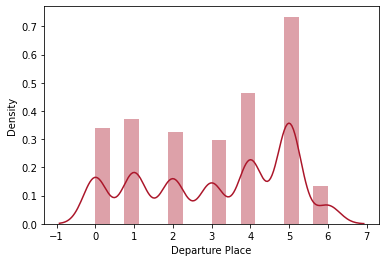

Arrival Place
-0.08213691039104287


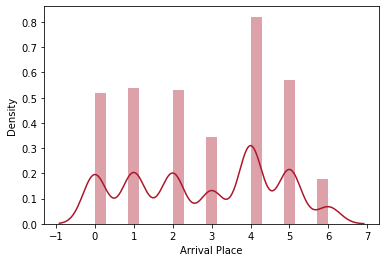

In [36]:
for col in x:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [37]:
x.skew() # check skewness

Departure Time     0.324038
Travel Time        0.692373
Stops              0.196971
Arrival Time      -0.330721
Airline           -0.645846
Departure Place   -0.287501
Arrival Place     -0.082152
dtype: float64

In [38]:
from sklearn.preprocessing import power_transform
df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns = x.columns)

In [39]:
df_new.skew()

Departure Time    -0.042910
Travel Time       -0.012334
Stops              0.020720
Arrival Time      -0.178128
Airline            0.001618
Departure Place   -0.292400
Arrival Place     -0.216075
dtype: float64

In [40]:
#changing skewness is not required

## finding the best random state

In [41]:
from sklearn.metrics import r2_score

In [42]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predLR = LR.predict(x_test)
    acc = r2_score(y_test, predLR)
    if acc > maxAccu:
        maxAccu = acc
        maxRS=i
print("Best accuracy is", maxAccu," on Random State ",maxRS)

Best accuracy is 0.40059852973499166  on Random State  25


## test train split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=25)

## regression

In [44]:
#Linear Regression

MAE: 1391.5054446967463
MSE: 3127951.992848693
RMSE: 1768.6017055427412
Variance: 0.40178701739179357
R2 Score: 0.40059852973499166


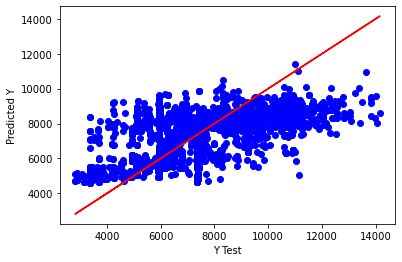

In [45]:
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
acc = r2_score(y_test, predLR)
acc
plt.scatter(y_test,predLR,color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, predLR))
print('MSE:', metrics.mean_squared_error(y_test, predLR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predLR)))
print('Variance:', metrics.explained_variance_score(y_test, predLR))
print('R2 Score:', r2_score(y_test, predLR))

## Regularization

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [47]:
from sklearn.linear_model import Lasso

parameters = {'alpha': [.0001, .001, .01, 1, 10], 'random_state': list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [48]:
ls = Lasso(alpha=10, random_state= 0)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)

pred_ls = ls.predict(x_test)

lss = r2_score(y_test, pred_ls)
lss

0.3999958384308798

In [49]:
#Lasso Regression does not improve the R2 score

In [50]:
#CatBoostRegressor

0:	learn: 1856.8969249	total: 177ms	remaining: 1.6s
1:	learn: 1737.0486462	total: 181ms	remaining: 724ms
2:	learn: 1657.2431466	total: 184ms	remaining: 429ms
3:	learn: 1627.5204871	total: 186ms	remaining: 279ms
4:	learn: 1601.1589343	total: 189ms	remaining: 189ms
5:	learn: 1589.2093712	total: 190ms	remaining: 127ms
6:	learn: 1568.1304990	total: 192ms	remaining: 82.2ms
7:	learn: 1558.8622480	total: 193ms	remaining: 48.3ms
8:	learn: 1541.8834484	total: 195ms	remaining: 21.6ms
9:	learn: 1536.1325294	total: 196ms	remaining: 0us
MAE: 1134.2631281244962
MSE: 2356949.3280156003
RMSE: 1535.2359193347452
R2 Score 0.5483438058568014
Variance: 0.5493657670401199


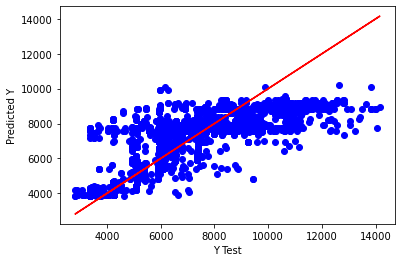

In [51]:
from catboost import CatBoostRegressor
# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=10,learning_rate=0.5,depth=2)
# Fit model
model.fit(x_train,y_train)
# Get predictions
preds = model.predict(x_test)

plt.scatter(y_test,preds,color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('R2 Score', r2_score(y_test, preds))
print('Variance:',metrics.explained_variance_score(y_test, preds))

In [52]:
#decisiontreeregressor

MAE: 858.7333445273641
MSE: 1692587.8460362442
RMSE: 1300.9949446620628
Variance: 0.6766410361479145
R2 Score: 0.6756537038335919


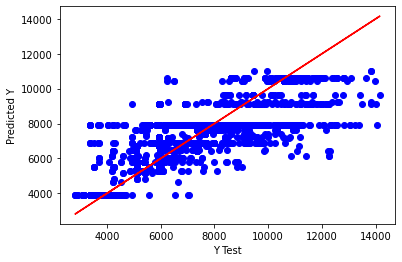

In [53]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x_train,y_train)

# Predict
preds = regr_1.predict(x_test)

# Plot the results
plt.scatter(y_test,preds,color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('Variance:',metrics.explained_variance_score(y_test, preds))
print('R2 Score:',metrics.r2_score(y_test, preds))

## hyper parameter tuning

In [54]:
from sklearn.model_selection import GridSearchCV

model = CatBoostRegressor()

gs1 = GridSearchCV(model,
                  param_grid = {'depth'         : [6,8,10],
                                'learning_rate' : [0.01, 0.05, 0.1],
                                'iterations'    : [30, 50, 100]},
                  cv=5,
                  n_jobs=1)

gs1.fit(x_train, y_train)

print(gs1.best_estimator_)
print(gs1.best_params_)
print(gs1.best_score_)

0:	learn: 2223.0516758	total: 2.35ms	remaining: 68.1ms
1:	learn: 2213.4601032	total: 4.71ms	remaining: 65.9ms
2:	learn: 2202.9694701	total: 6.99ms	remaining: 62.9ms
3:	learn: 2191.5568168	total: 9.21ms	remaining: 59.8ms
4:	learn: 2180.8194489	total: 11.3ms	remaining: 56.7ms
5:	learn: 2170.4882256	total: 13.5ms	remaining: 54ms
6:	learn: 2159.5173522	total: 15.6ms	remaining: 51.3ms
7:	learn: 2148.6700319	total: 18ms	remaining: 49.4ms
8:	learn: 2138.1684223	total: 20.2ms	remaining: 47.2ms
9:	learn: 2127.7098326	total: 22.4ms	remaining: 44.9ms
10:	learn: 2119.5705591	total: 24.6ms	remaining: 42.6ms
11:	learn: 2109.7164357	total: 26.8ms	remaining: 40.3ms
12:	learn: 2098.9513311	total: 29ms	remaining: 38ms
13:	learn: 2088.3828944	total: 31.5ms	remaining: 35.9ms
14:	learn: 2078.2367002	total: 33.9ms	remaining: 33.9ms
15:	learn: 2068.7796959	total: 36ms	remaining: 31.5ms
16:	learn: 2059.2824020	total: 38.2ms	remaining: 29.2ms
17:	learn: 2049.5962202	total: 40.5ms	remaining: 27ms
18:	learn: 204

0:	learn: 2107.5341925	total: 13ms	remaining: 1.28s
1:	learn: 1985.0108573	total: 25.2ms	remaining: 1.24s
2:	learn: 1882.1123448	total: 37.2ms	remaining: 1.2s
3:	learn: 1791.6380929	total: 44.2ms	remaining: 1.06s
4:	learn: 1699.5262554	total: 56.3ms	remaining: 1.07s
5:	learn: 1632.0332769	total: 68.9ms	remaining: 1.08s
6:	learn: 1569.0562116	total: 81.5ms	remaining: 1.08s
7:	learn: 1523.6031277	total: 94ms	remaining: 1.08s
8:	learn: 1470.5058559	total: 107ms	remaining: 1.08s
9:	learn: 1421.2667140	total: 123ms	remaining: 1.11s
10:	learn: 1389.6401574	total: 138ms	remaining: 1.12s
11:	learn: 1358.4703808	total: 150ms	remaining: 1.1s
12:	learn: 1327.1316185	total: 161ms	remaining: 1.08s
13:	learn: 1296.1613660	total: 172ms	remaining: 1.06s
14:	learn: 1270.1315057	total: 184ms	remaining: 1.04s
15:	learn: 1249.5199106	total: 195ms	remaining: 1.02s
16:	learn: 1225.1566635	total: 208ms	remaining: 1.01s
17:	learn: 1206.1858675	total: 220ms	remaining: 1s
18:	learn: 1199.8425705	total: 222ms	re

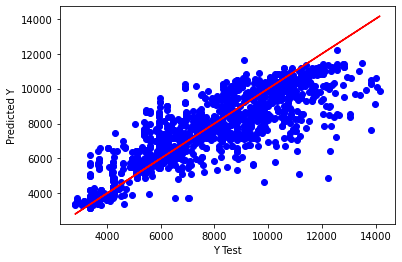

In [57]:
new_model1 = CatBoostRegressor(depth= 10, iterations = 100, learning_rate = 0.1)
new_model1.fit(x_train, y_train)
preds = new_model1.predict(x_test)

# Plot the results
plt.scatter(y_test,preds,color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('Variance:',metrics.explained_variance_score(y_test, preds))
print('R2 Score:',metrics.r2_score(y_test, preds))

In [58]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, BayesianRidge,RANSACRegressor,HuberRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline

In [59]:
sc = ('Scaler', StandardScaler())
est =[]
est.append(('LinearRegression', Pipeline([sc, ('LinearRegression', LinearRegression())])))
est.append(('Ridge', Pipeline([sc, ('Ridge', Ridge())])))
est.append(('Lasso', Pipeline([sc, ('Lasso', Lasso())])))
est.append(('BayesianRidge', Pipeline([sc, ('BayesianRidge', BayesianRidge())])))
est.append(('ElasticNet', Pipeline([sc,('Elastic', ElasticNet())])))
est.append(('SGD', Pipeline([sc,('SGD', SGDRegressor())])))
est.append(('Huber', Pipeline([sc,('Huber', HuberRegressor())])))
est.append(('RANSAC', Pipeline([sc,('RANSAC', RANSACRegressor())])))
est.append(('GradientBoosting', Pipeline([sc,('GradientBoosting',GradientBoostingRegressor())])))
est.append(('AdaBoost', Pipeline([sc, ('AdaBoost', AdaBoostRegressor())])))
est.append(('ExtraTree', Pipeline([sc,('ExtraTrees', ExtraTreesRegressor())])))
est.append(('RandomForest', Pipeline([sc,('RandomForest', RandomForestRegressor())]))) 
est.append(('Bagging', Pipeline([sc,('Bagging', BaggingRegressor())])))
est.append(('KNeighbors', Pipeline([sc,('KNeighbors', KNeighborsRegressor())])))
est.append(('DecisionTree', Pipeline([sc,('DecisionTree', DecisionTreeRegressor())])))
est.append(('XGB', Pipeline([sc,('XGB', XGBRegressor())])))

In [60]:
import warnings
warnings.filterwarnings(action='ignore')
seed = 4
splits = 7
models_score ={}
for i in est:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1], x_train, y_train, cv=kfold)
    models_score.update({i[0] : results.mean()})
    
sorted(models_score.items(), key= lambda v:v[1], reverse=True)

[('RandomForest', 0.7737133155510799),
 ('XGB', 0.7721565966304781),
 ('Bagging', 0.768521813976206),
 ('ExtraTree', 0.7652555880472789),
 ('DecisionTree', 0.7366634098728845),
 ('KNeighbors', 0.7285571834918082),
 ('GradientBoosting', 0.7146707134287512),
 ('AdaBoost', 0.5342314187180923),
 ('Lasso', 0.35535718041359826),
 ('BayesianRidge', 0.35533442615845495),
 ('Ridge', 0.35509277295127145),
 ('SGD', 0.35505771094734817),
 ('LinearRegression', 0.35494103981942765),
 ('Huber', 0.3476090221928619),
 ('ElasticNet', 0.33525059588248646),
 ('RANSAC', -1.5679017564873194)]

In [61]:
base_model_scores = sorted(models_score.items(), key= lambda v:v[1], reverse=True)

In [62]:
base_model_scores

[('RandomForest', 0.7737133155510799),
 ('XGB', 0.7721565966304781),
 ('Bagging', 0.768521813976206),
 ('ExtraTree', 0.7652555880472789),
 ('DecisionTree', 0.7366634098728845),
 ('KNeighbors', 0.7285571834918082),
 ('GradientBoosting', 0.7146707134287512),
 ('AdaBoost', 0.5342314187180923),
 ('Lasso', 0.35535718041359826),
 ('BayesianRidge', 0.35533442615845495),
 ('Ridge', 0.35509277295127145),
 ('SGD', 0.35505771094734817),
 ('LinearRegression', 0.35494103981942765),
 ('Huber', 0.3476090221928619),
 ('ElasticNet', 0.33525059588248646),
 ('RANSAC', -1.5679017564873194)]

### Feature Selection

In [63]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,  f_classif

In [64]:
#Selecting 7 features out of 8
# define feature selection
bst_fs = SelectKBest(score_func=f_regression, k=5)
# apply feature selection
bst_fs.fit(x_train, y_train)
# get the column indices
cols  = bst_fs.get_support(indices=True)
best_df = x_train.iloc[:,cols]

best_df

,Departure Time,Travel Time,Stops,Arrival Time,Departure Place
1840,555,395,1,1230,5
3519,700,130,0,910,4
5662,1350,240,1,1750,2
3078,1240,60,0,1340,1
985,1040,130,0,1250,5
...,...,...,...,...,...
4894,815,410,1,1505,4
7146,2020,100,0,2200,0
1184,700,125,0,905,5
2965,1645,240,1,2045,1


### Model Training with Feature Selection

In [65]:
import warnings
warnings.filterwarnings(action='ignore')
seed = 4
splits = 7
models_score ={}
for i in est:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1], best_df, y_train, cv=kfold)
    models_score.update({i[0] : results.mean()})
    
sorted(models_score.items(), key= lambda v:v[1], reverse=True)

[('RandomForest', 0.7226028304238262),
 ('XGB', 0.7196365403688934),
 ('Bagging', 0.7190536716896716),
 ('ExtraTree', 0.7171207711315791),
 ('DecisionTree', 0.6660167591680335),
 ('KNeighbors', 0.6577487250984307),
 ('GradientBoosting', 0.5951089692825902),
 ('AdaBoost', 0.47507606618230164),
 ('Lasso', 0.32226999333253586),
 ('BayesianRidge', 0.3222148887349419),
 ('Ridge', 0.32190115146847426),
 ('LinearRegression', 0.3217400746156712),
 ('SGD', 0.3214719656793145),
 ('Huber', 0.31585986886787304),
 ('ElasticNet', 0.3082572973295982),
 ('RANSAC', -0.9887182671427327)]

In [66]:
model_fs = sorted(models_score.items(), key= lambda v:v[1], reverse=True)

### Feature Extraction

In [67]:
#PCA

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaled_df = StandardScaler().fit_transform(x_train)
pca = PCA(n_components=0.99, svd_solver='full')
pca_df = pca.fit_transform(scaled_df)

pca_df.shape

(5863, 6)

### Model training with Feature Extraction

In [69]:
import warnings
warnings.filterwarnings(action='ignore')
seed = 4
splits = 7
models_score ={}
for i in est:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1], pca_df, y_train, cv=kfold)
    models_score.update({i[0] : results.mean()})
    
sorted(models_score.items(), key= lambda v:v[1], reverse=True)

[('RandomForest', 0.7694795730293345),
 ('XGB', 0.7669908088760066),
 ('ExtraTree', 0.7641640308254056),
 ('Bagging', 0.75990267570043),
 ('DecisionTree', 0.7327265753845841),
 ('KNeighbors', 0.7246983217598224),
 ('GradientBoosting', 0.7093315823998628),
 ('AdaBoost', 0.5168338066329536),
 ('BayesianRidge', 0.3553760069061956),
 ('Lasso', 0.35537570670271235),
 ('Ridge', 0.35537457677369233),
 ('LinearRegression', 0.3553740893800761),
 ('SGD', 0.35488732875976003),
 ('Huber', 0.3480517004642746),
 ('ElasticNet', 0.31621858983520335),
 ('RANSAC', -0.6812128283845481)]

In [70]:
model_fe = sorted(models_score.items(), key= lambda v:v[1], reverse=True)

In [71]:
# Top 2 models with scores
base_model_scores[0]

('RandomForest', 0.7737133155510799)

In [72]:
base_model_scores[1]

('XGB', 0.7721565966304781)

In [73]:
base_model_scores[2]

('Bagging', 0.768521813976206)

### Hyperparameter Tuning

In [74]:
from sklearn.model_selection import GridSearchCV

model = GradientBoostingRegressor()

gs = GridSearchCV(model, param_grid = {'learning_rate': [0.01,0.02], 'subsample' : [0.9, 0.5],
                                 'n_estimators' : [100,500], 'max_depth' : [4,6]}, cv=5, n_jobs=1)

gs.fit(x_train, y_train)

print(gs.best_params_)
print(gs.best_score_)

{'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.9}
0.7752705760023473


MAE: 625.6696388422101
MSE: 1068922.5166014158
RMSE: 1033.8870908379772
Variance: 0.7952966664281813
R2 Score: 0.7951651017934103


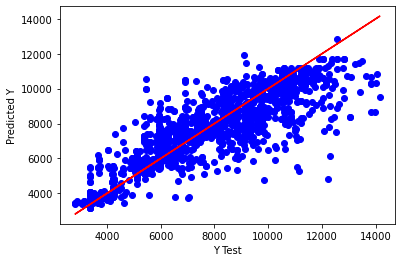

In [75]:
new_model = GradientBoostingRegressor(learning_rate= 0.02, max_depth= 6, n_estimators= 500, subsample= 0.5)
new_model.fit(x_train, y_train)
preds = new_model.predict(x_test)

# Plot the results
plt.scatter(y_test,preds,color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('Variance:',metrics.explained_variance_score(y_test, preds))
print('R2 Score:',metrics.r2_score(y_test, preds))

In [76]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()

rfr = GridSearchCV(model, param_grid = { "n_estimators" : [10,20,30], "max_features" : ["auto", "sqrt", "log2"],
                                       "min_samples_split" : [2,4,8], "bootstrap": [True, False], }, cv=5, n_jobs=1)

rfr.fit(x_train, y_train)

print(rfr.best_params_)
print(rfr.best_score_)

{'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 10}
0.7658912651369769


MAE: 609.4868222092416
MSE: 1149291.9528262843
RMSE: 1072.0503499492384
Variance: 0.77983902902131
R2 Score: 0.7797641115136064


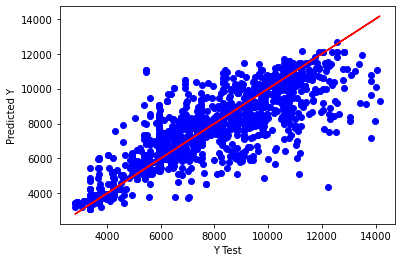

In [77]:
new_model1 = RandomForestRegressor(bootstrap= True, max_features= 'auto', min_samples_split= 2, n_estimators= 20)
new_model1.fit(x_train, y_train)
preds = new_model1.predict(x_test)

# Plot the results
plt.scatter(y_test,preds,color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('Variance:',metrics.explained_variance_score(y_test, preds))
print('R2 Score:',metrics.r2_score(y_test, preds))

In [78]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(x_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[02:33:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[02:33:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.752575960428179
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


[02:33:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[02:33:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


MAE: 619.5159263626019
MSE: 1080597.797412776
RMSE: 1039.5180601667178
Variance: 0.7930009525112399
R2 Score: 0.792927797480529


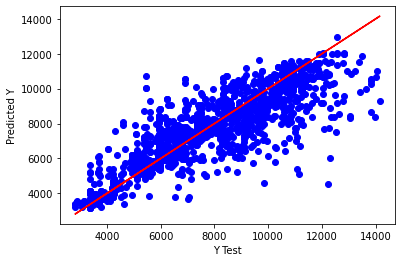

In [79]:
new_model_XGB = XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.05, 
                             max_depth = 6, min_child_weight = 4, n_estimators = 500, nthread = 4, objective = 'reg:linear', silent = 1, subsample = 0.7)
new_model_XGB.fit(x_train, y_train)
preds = new_model_XGB.predict(x_test)

# Plot the results
plt.scatter(y_test,preds,color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('Variance:',metrics.explained_variance_score(y_test, preds))
print('R2 Score:',metrics.r2_score(y_test, preds))

In [80]:
import joblib
joblib.dump(new_model, "Flight Price Model.pkl") 

['Flight Price Model.pkl']